# Laboratorio 03: Raíces.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Santiago Silva
*Métodos computacionales 2025-I*

---

# 1

La ecuación de Kepler juega un papel importante en la mecánica celeste, ya que permite el calculo de la posición angular de objetos orbitantes. Para todas las órbitas elipticas, la ecuación

$$M = E- e\sin(E)$$

siendo $M$ la anomalía media, $E$ la anomalía excéntrica y $e$ la excentricidad ($e= \sqrt{1-b/a}$) (con $a>b$ los semiejes). Los astrónomos definen las "anomalías"  como posiciones angulares: la anomalía media $M$ es la posición angular del objeto en una órbita circular ficticia y, suponiendo una velocidad angular constante, puede relacionarse con el lapso de tiempo transcurrido desde el paso por el perihelio

$$M= \frac{2\pi}{T} (t-t_0)$$

donde $T$ es el periodo orbital y $t_0$ el tiempo cuando el objeto está en el perihelio.

Para el cometa Halley $e=0.9672671$, $T=75.96000$ años y $t_0=1986.1113$ años (Febrero 9 de 1986).

* Encuentre $E$ para el cometa Halley el 1 de abril de 1986. Para esto, haga una gráfica de

$$f(E) = E - e\sin(E) - M$$

para $E\in [0,1]$.

* Grafique $E=E(t)$ para todo un periodo de revolución y resuelva usando el método de Newton y secante

$$E-e\sin(E) - M(t) = 0$$

con un paso de $\Delta t = T/100$. $t_i = t_0 + (i)*\Delta t$, comenzando en $E(t_0) = 0$

Usando Newton: E := 0.261250120382 rad
Usando Secante: E := 0.261250120382 rad


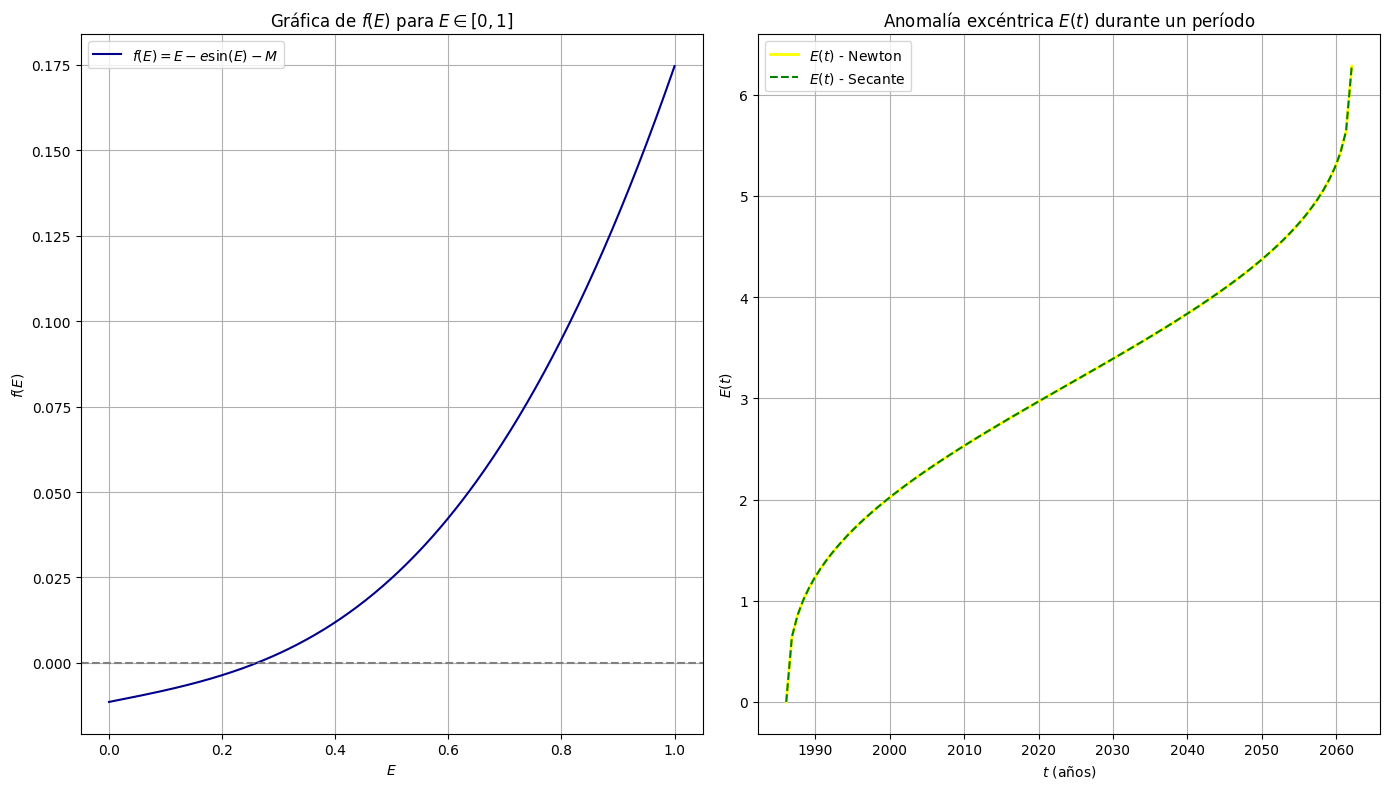

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#parametros
e = 0.9672671 #excentricidad
T = 75.96000 #periodo orbital en años
t0 = 1986.1113 #tiempo perihelio (9 febrero 1986)

t_obj = 1986 + (31 + 28 + 31 + 1) / 365 #convertimos la fecha (abril 1- 1986) en años

M = 2 * np.pi / T * (t_obj - t0) #anomalia media

def f(E, M):
    return E - e * np.sin(E) - M

def df(E):
    return 1 - e * np.cos(E)

#Método de Newton
def newton_method(f, df, M, E0, tol=1e-10, max_iter=100):
    E = E0
    for i in range(max_iter):
        E_new = E - f(E, M) / df(E)
        if abs(E_new - E) < tol:
            return E_new
        E = E_new
    return E

#Método de la secante
def secant_method(f, M, E0, E1, tol=1e-10, max_iter=100):
    for i in range(max_iter):
        f0 = f(E0, M)
        f1 = f(E1, M)
        if abs(f1 - f0) < 1e-14:
            return E1  # evitar división por cero
        E2 = E1 - f1 * (E1 - E0) / (f1 - f0)
        if abs(E2 - E1) < tol:
            return E2
        E0, E1 = E1, E2
    return E1

E_newton = newton_method(f, df, M, M)
E_secant = secant_method(f, M, 0.0, 1.0)

print(f"Usando Newton: E := {E_newton:.12f} rad")
print(f"Usando Secante: E := {E_secant:.12f} rad")

E_vals = np.linspace(0, 1, 400)
f_vals = [f(E, M) for E in E_vals]

plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
plt.plot(E_vals, f_vals, label=r'$f(E) = E - e \sin(E) - M$', color='darkblue')
plt.axhline(0, color='gray', linestyle='--')
plt.title(r'Gráfica de $f(E)$ para $E \in [0,1]$')
plt.xlabel(r'$E$')
plt.ylabel(r'$f(E)$')
plt.grid(True)
plt.legend()

delta_t = T / 100
tiempo = t0 + np.arange(101) * delta_t
M_vals = 2 * np.pi / T * (tiempo - t0)

E_t_newton = [newton_method(f, df, Mi, Mi) for Mi in M_vals]

E_t_secant = [secant_method(f, Mi, 0.0, 1.0) for Mi in M_vals]

plt.subplot(1, 2, 2)
plt.plot(tiempo, E_t_newton, label=r'$E(t)$ - Newton', color='yellow', linewidth=2)
plt.plot(tiempo, E_t_secant, '--', label=r'$E(t)$ - Secante', color='green')
plt.xlabel(r'$t$ (años)')
plt.ylabel(r'$E(t)$')
plt.title(r'Anomalía excéntrica $E(t)$ durante un período')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 2
En la teoria de campo medio, la magnetización como función de la temperatura de un material magnético puede ser calculada como:

$$
m(T) = \tanh\left( \frac{m(T)}{T} \right)
$$

donde $m$ y $T$ son la magnetizacion y temperatura reducida respectivamente


Para $T = 0.5$, determine:

- La magnetización reducida empleando el metodo de la secante y Newton-Raphson (Muestre su resultado con 4 cifras).

- Valide su respuestado con el metodo de punto fijo (Muestre su resultado con 4 cifras).

Ahora, defina `T = np.linspace(0.1,0.99,100)`, y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.

T = 0.5
Newton-Raphson: m := 0.9575
Secante:        m := 0.9575
Punto Fijo:     m := 0.9575


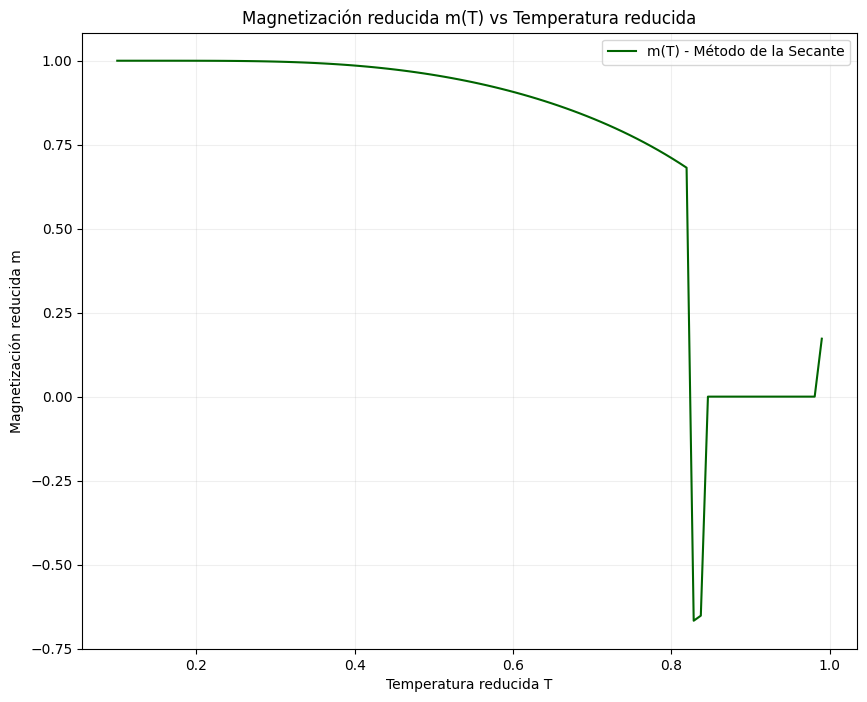

In [2]:
def f(m, T): #funcion ec implicita
    return m - np.tanh(m / T)

def df(m, T):
    return 1 - (1 / T) * (1 - np.tanh(m / T) ** 2)


def newton_met(T, m0 = 0.5, tol = 1e-12, max_iter = 1000):
    m = m0
    for _ in range(max_iter):
        f_val = f(m, T)
        df_val = df(m, T)
        if abs(df_val) < 1e-14:
            break
        m_new = m - f_val / df_val
        if abs(m_new - m) < tol:
            return m_new
        m = m_new
    return m

def met_secan(T, m0 = 0.1, m1 = 0.9, tol = 1e-12, max_iter = 1000):
    for _ in range(max_iter):
        f0 = f(m0, T)
        f1 = f(m1, T)
        if abs(f1 - f0) < 1e-14:
            return m1
        m2 = m1 - f1 * (m1 - m0) / (f1 - f0)
        if abs(m2 - m1) < tol:
            return m2
        m0, m1 = m1, m2
    return m1

def punto_med_fijo(T, m0 = 0.5, tol = 1e-12, max_iter = 1000):
    m = m0
    for _ in range(max_iter):
        m_new = np.tanh(m / T)
        if abs(m_new - m) < tol:
            return m_new
        m = m_new
    return m

T_val = 0.5 #evaluamos para T = 0.5
m_newton = newton_met(T_val)
m_secant = met_secan(T_val)
m_fixed = punto_med_fijo(T_val)

print(f"T = {T_val}")
print(f"Newton-Raphson: m := {m_newton:.4f}") #mostramos el resultado con 4 cifras
print(f"Secante:        m := {m_secant:.4f}")
print(f"Punto Fijo:     m := {m_fixed:.4f}")

#grafica
T_vals = np.linspace(0.1, 0.99, 100)
m_vals = [met_secan(T) for T in T_vals]

plt.figure(figsize=(10, 8))
plt.plot(T_vals, m_vals, label='m(T) - Método de la Secante', color='darkgreen')
plt.xlabel('Temperatura reducida T')
plt.ylabel('Magnetización reducida m')
plt.title('Magnetización reducida m(T) vs Temperatura reducida')
plt.grid(True, alpha = 0.2)
plt.legend()
plt.show()

# 3

La energía libre de Gibbs para 1 mol de hidrógeno a una temperatura $T$ está dada por:

$$G = -RT \ln \left[ \left( \frac{T}{T_0} \right)^{5/2} \right]$$

donde:  
- $ R = 8.314 \, \text{J/K} $ es la constante de los gases.  
- $ T_0 = 4.444 \, \text{J/K} $ es una constante de referencia.  

Determinar la temperatura $ T $ a la cual $ G = -10^5 \, \text{J}$.  



In [3]:
#parametros
R = 8.314 #J/K
T0 = 4.444 #K
G = -1e5 #J

def f(T):
    return -R * T * (5/2) * np.log(T / T0) - G #por propiedades de LN, el exponente 5/2 baja

def df(T):
    return -R * (5/2) * (np.log(T / T0) + 1)

def newton(f, df, T_init, tol=1e-12, max_iter=1000): #aplicamos metodo newton raphson
    T = T_init
    for _ in range(max_iter):
        f_val = f(T)
        df_val = df(T)
        if abs(df_val) < 1e-12:
            raise ValueError("Derivada demasiado pequeña.")
        T_new = T - f_val / df_val
        if abs(T_new - T) < tol:
            return T_new
        T = T_new
    raise RuntimeError("No converge")

#solución inicial tentativa
T_sol = newton(f, df, T_init=300)  #300 K como punto inicial

print(f"Temperatura T aproximadamente: {T_sol:.12f} K")

Temperatura T aproximadamente: 904.974341338867 K


# 4

La distribución de intensidad en la difracción de Fraunhofer por una rendija de ancho $W$ y altura infinita, iluminada con luz monocromática de longitud de onda $\lambda$, está dada por:

$$I(\theta) = I_0 \left[ \frac{\sin(\pi W \sin \theta / \lambda)}{\pi W \sin \theta / \lambda} \right]^2,$$

donde $\theta$ es el ángulo de observación respecto a la dirección incidente. Introduciendo la variable adimensional:

$$x = \pi W \sin \theta / \lambda,$$

la intensidad y su derivada se expresan como:

$$I(x) = I_0 \left( \frac{\sin x}{x} \right)^2, \quad I(0) = I_0,$$
$$I'(x) = \frac{2I_0}{x} \left( \cos x - \frac{\sin x}{x} \right) \frac{\sin x}{x}, \quad I'(0) = 0.$$

- Graficar $I(x)$ y $I'(x)$ en el intervalo $x \in [-10, 10]$.

- Calcular el valor $x_{1/2}$ (positivo) donde $I(x) = I_0/2$, resolviendo la ecuación $I(x) - I_0/2 = 0$ con el método de la secante y aproximación inicial $x_0 = \pi$.

- Encontrar los máximos locales $x_i \in [-10, 10]$ resolviendo $I'(x) = 0$.  
- Usar un paso $h = 0.5$ para separar raíces y aplicar el *método de la regula falsi* (falsa posición) para mantenerlas acotadas.

**Nota:**  
Puede tomar $I_0=1$.

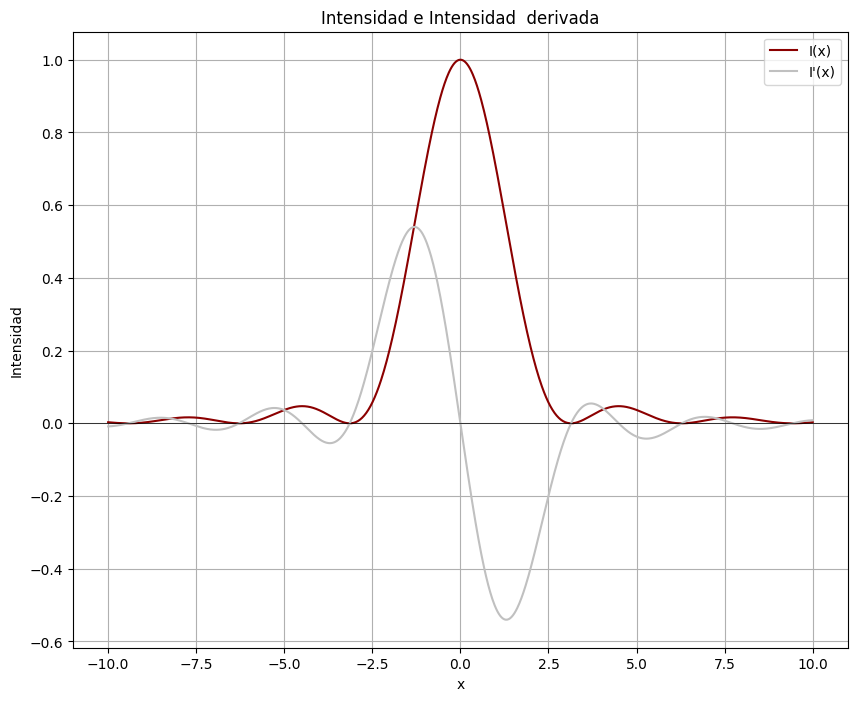

x_1/2 (I = I0/2): 1.391557

Máximos locales de I(x):
x = -9.42477796, I(x) = 0.00000000
x = -7.72525184, I(x) = 0.01648003
x = -6.28318531, I(x) = 0.00000000
x = -4.49340946, I(x) = 0.04719045
x = -3.14159265, I(x) = 0.00000000
x = 3.14159265, I(x) = 0.00000000
x = 4.49340946, I(x) = 0.04719045
x = 6.28318531, I(x) = 0.00000000
x = 7.72525184, I(x) = 0.01648003
x = 9.42477796, I(x) = 0.00000000


In [4]:
I0 = 1 #parametro recomendado

def I(x):
    return np.where(x == 0, I0, I0 * (np.sin(x) / x)**2)

def dI(x):
    x = np.asarray(x)
    deriv = np.zeros_like(x)

    mask = x != 0 #evitamos x = 0
    deriv[mask] = (2 * I0 / x[mask]) * ((np.cos(x[mask]) - np.sin(x[mask]) / x[mask]) * np.sin(x[mask]) / x[mask])

    return deriv

def secante(f, x0, x1, tol = 1e-12, max_iter = 1000):
    for _ in range(max_iter):
        if f(x1) - f(x0) == 0:
            return None
        x2 = x1 - f(x1)*(x1 - x0)/(f(x1) - f(x0))
        if abs(x2 - x1) < tol:
            return x2
        x0, x1 = x1, x2
    return None

def regula_falsi(f, a, b, tol = 1e-12, max_iter = 1000):
    fa, fb = f(a), f(b)
    if fa * fb > 0:
        return None
    for _ in range(max_iter):
        c = b - fb * (b - a) / (fb - fa)
        fc = f(c)
        if abs(fc) < tol:
            return c
        if fa * fc < 0:
            b, fb = c, fc
        else:
            a, fa = c, fc
    return None

#grafica I(x), I'(x)
plt.figure(figsize = (10, 8))
x_vals = np.linspace(-10, 10, 1000)
plt.plot(x_vals, I(x_vals), label='I(x)', color = 'darkred')
plt.plot(x_vals, dI(x_vals), label="I'(x)", color = 'silver')
plt.axhline(0, color='black', lw=0.5)
plt.legend()
plt.title('Intensidad e Intensidad  derivada')
plt.xlabel('x')
plt.ylabel('Intensidad')
plt.grid(True)
plt.show()

#x_1/2
f_half = lambda x: I(x) - I0 / 2
found = False
for x0 in np.linspace(1, 3, 20):
    x1 = x0 + 0.2
    if f_half(x0) * f_half(x1) < 0:
        x_half = secante(f_half, x0, x1)
        if x_half is not None:
            print(f"x_1/2 (I = I0/2): {x_half:.6f}")
            found = True
            break
if not found:
    print("No se encontró una raíz para I(x) = I0/2.")

#maximos locales
h = 0.5
maximos = []
for xi in np.arange(-10, 10, h):
    a, b = xi, xi + h
    if dI(a) * dI(b) < 0:
        raiz = regula_falsi(dI, a, b)
        if raiz is not None:
            if not any(np.isclose(raiz, m, atol=1e-3) for m in maximos):
                maximos.append(raiz)

print("\nMáximos locales de I(x):")
for x in sorted(maximos):
    print(f"x = {x:.8f}, I(x) = {I(x):.8f}")


# 5

La ley de Planck describe la densidad espectral de energía de la radiación electromagnética emitida por un cuerpo negro en equilibrio térmico (Toda et al., 1998):

$$u(\lambda,T)=\frac{8\pi hc}{\lambda^{5}}\,\frac{1}{\exp\left(hc/\left(\lambda k_{B}T\right)\right)-1},$$

donde:
- $T$ = temperatura de equilibrio (K)
- $\lambda$ = longitud de onda (m)
- $h=6.626 \times 10^{-34}$ J $\cdot$ s (constante de Planck)
- $k_{B}=1.381 \times 10^{-23}$ J$\cdot$K$^{-1}$ (constante de Boltzmann)
- $c=2.998 \times 10^{8}$ m$\cdot$s$^{-1}$ (velocidad de la luz)

Introduciendo las variables adimensionales:
$$x=\frac{\lambda}{\lambda_{0}}, \quad \lambda_{0}=\frac{hc}{k_{B}T}, \quad K=\frac{8\pi k_{B}T}{\lambda_{0}^{4}},$$

la ley se simplifica a:
$$u(\lambda,T)=K\frac{1}{x^{5}\left(e^{1/x}-1\right)}.$$

La derivada (para encontrar máximos):
$$\frac{\partial u}{\partial\lambda}=K\lambda_{0}\frac{5x+(1-5x)e^{1/x}}{x^{7}(e^{1/x}-1)^{2}}. $$

- Graficar $u(\lambda,T)$ y $\partial u/\partial\lambda$ para $T=4000, 5000, 6000$ K.

- Resolver $\partial u/\partial\lambda=0$ para $T=5778$ K con el método de Bisección y de Newton.

- Validar la ley de desplazamiento de Wien: $\lambda_{\rm max}T \approx 2.898 \times 10^{-3}$ m $\cdot$ K

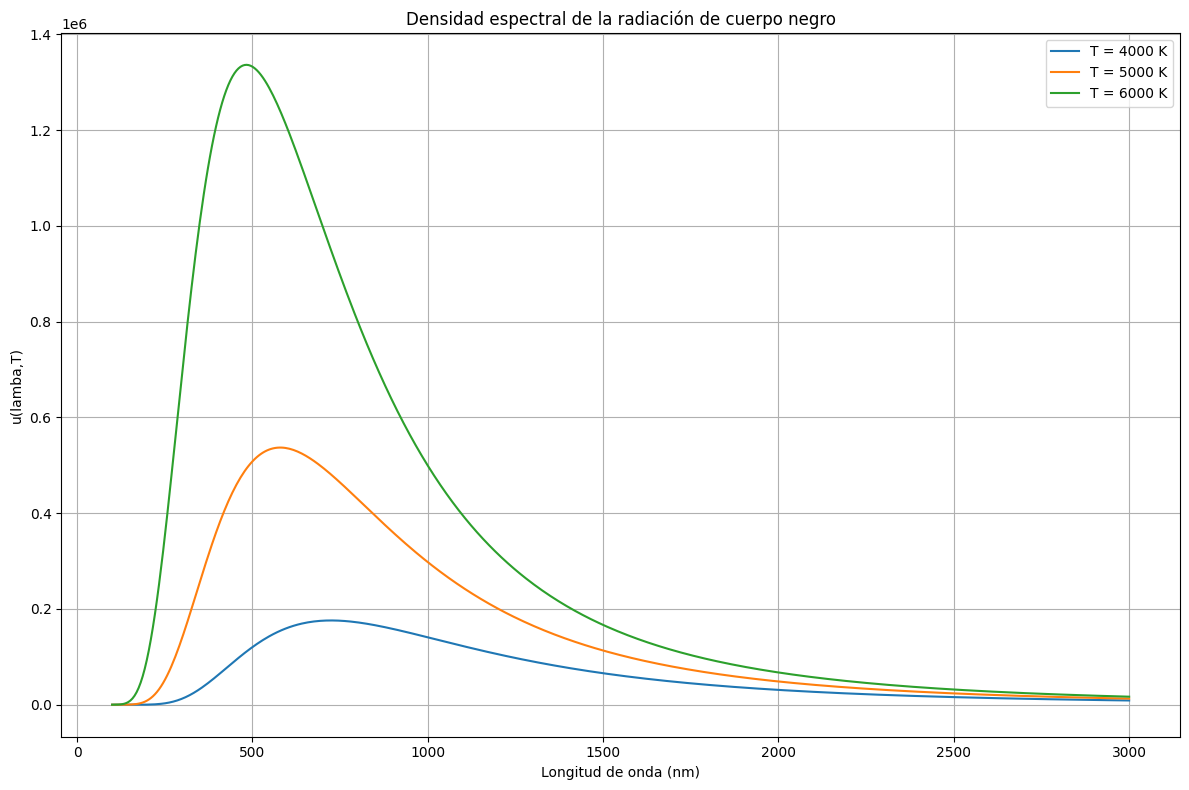

Raíz método de Bisección (x): 0.20140523527276177
Raíz método de Newton (x): 0.20140523527264473
lambda_max (Bisección): 1.236064372173e-05 m
lambda_max (Newton): 1.236064372174e-05 m
lambda_max * T (Bisección): 0.071419799424 mK
lambda_max * T (Newton): 0.071419799424 mK
Valor esperado por Wien: 0.002898000000 mK


In [5]:
from scipy.optimize import bisect, newton

#parametros
h = 6.626e-34#constante de Planck (J·s)
kB = 1.381e-23#Constante de Boltzmann (J/K)
c = 2.998e8#Velocidad de la luz (m/s)

#ley de planck
def planck_ley(lam, T):
    return (8 * np.pi * h * c) / (lam**5 * (np.exp(h * c / (lam * kB * T)) - 1))

#derivada ley de planck
def dplanck(lam, T):
    x = h * c / (lam * kB * T)
    numerator = (5 + x) * np.exp(x) - 5
    denominator = (np.exp(x) - 1)**2
    return (8 * np.pi * h * c) / lam**6 * (numerator / denominator)

# grafica para T = 4000, 5000, 6000
lam = np.linspace(1e-7, 3e-6, 500)
temps = [4000, 5000, 6000]

plt.figure(figsize=(12, 8))
for T in temps:
    plt.plot(lam * 1e9, planck_ley(lam, T), label=f'T = {T} K')
plt.xlabel("Longitud de onda (nm)")
plt.ylabel("u(lamba,T)")
plt.title("Densidad espectral de la radiación de cuerpo negro")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#parte 2 T = 5778
T_sol = 5778


def f_adimensional(x):
    ex = np.exp(1 / x)
    return (5 * x + (1 - 5 * x) * ex) / (ex - 1)**2

#ahora usamos metodo de la bisección y newton raphson
x_root_bisec = bisect(f_adimensional, 0.1, 10)
x_root_newton = newton(f_adimensional, x0 = 5)

#calculamos lambda con cada metodo
lambda_max_bisec = h * c / (kB * T_sol * x_root_bisec)
lambda_max_newton = h * c / (kB * T_sol * x_root_newton)

#comparacion ley Wein
wien_ley = 2.898e-3 #mK

print(f"Raíz método de Bisección (x): {x_root_bisec}")
print(f"Raíz método de Newton (x): {x_root_newton}")
print(f"lambda_max (Bisección): {lambda_max_bisec:.12e} m")
print(f"lambda_max (Newton): {lambda_max_newton:.12e} m")
print(f"lambda_max * T (Bisección): {lambda_max_bisec * T_sol:.12f} mK")
print(f"lambda_max * T (Newton): {lambda_max_newton * T_sol:.12f} mK")
print(f"Valor esperado por Wien: {wien_ley:.12f} mK")

# 6

Considere un pozo de potencial cuadrado de ancho $w$, con paredes de altura $V$:

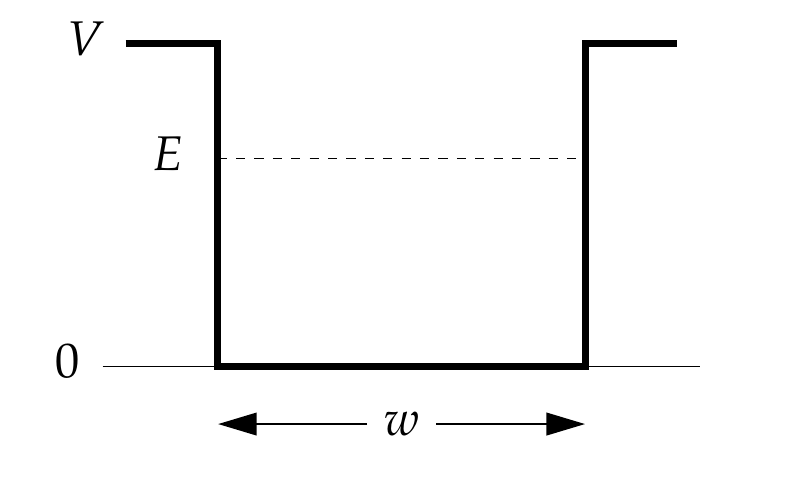

Usando la ecuación de Schrödinger, se puede demostrar que las energías permitidas $E$ de una partícula cuántica de masa $m$ atrapada en el pozo son soluciones de:

$$\tan \sqrt{w^2 m E / 2 \hbar^2} =
\begin{cases}
\sqrt{(V - E) / E} & \text{para los estados pares,} \\
-\sqrt{E / (V - E)} & \text{para los estados impares,}
\end{cases}$$

donde los estados se numeran comenzando desde 0, siendo el estado base el estado 0, el primer estado excitado el estado 1, y así sucesivamente.

- Para un electrón (masa $ 9.11 \times 10^{-31} \, \text{kg} $) en un pozo con $ V = 20 \, \text{eV} $ y $ w = 1 \, \text{nm} $, escriba un programa en Python para graficar las tres cantidades:

$$y_1 = \tan \sqrt{w^2 m E / 2 \hbar^2}, \quad y_2 = \sqrt{\frac{V - E}{E}}, \quad y_3 = -\sqrt{\frac{E}{V - E}},$$

en el mismo gráfico, como función de $ E $ desde $ E = 0 $ hasta $ E = 20 \, \text{eV} $. A partir de su gráfico, haga estimaciones aproximadas de las energías de los primeros seis niveles de energía de la partícula.

- Escriba un segundo programa para calcular los valores de los primeros seis niveles de energía en electrón-voltios con una precisión de $ 0.001 \, \text{eV} $ usando el método de la bisección.

Primeros 6 niveles de energía (eV) con precisión de 0.001 eV:
Nivel 0: 1.999 eV
Nivel 1: 3.388 eV
Nivel 2: 5.999 eV
Nivel 3: 7.999 eV
Nivel 4: 9.408 eV
Nivel 5: 11.223 eV


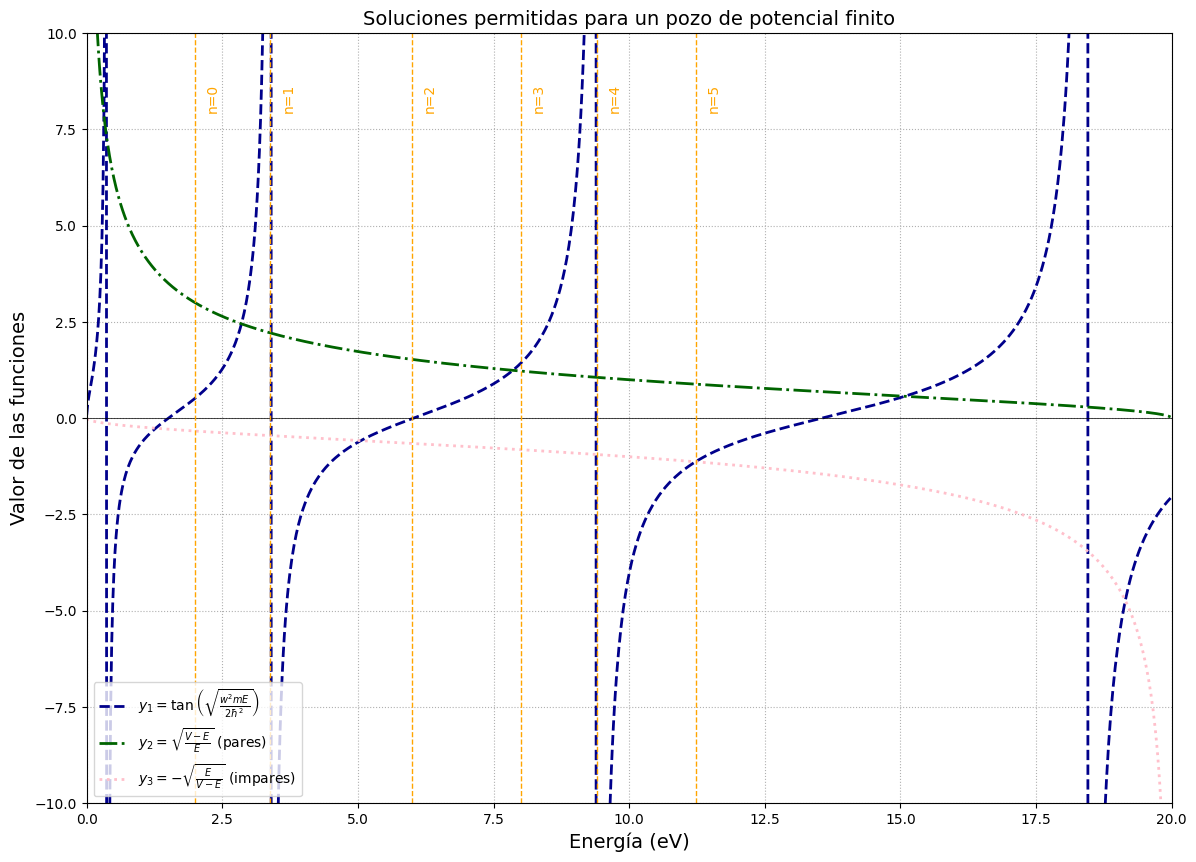

In [6]:

#parametros
m = 9.11e-31# masa electrón (kg)
hbar = 1.055e-34 #Constante de Planck reducida (J·s)
eV = 1.602e-19 #1 eV en Joules
V0 = 20 * eV  #Altura del pozo (Joules)
w = 1e-9 #Ancho del pozo (metros)

E_eV = np.linspace(0.001, 20, 1000)
E_eV = E_eV[E_eV < 19.999]
E = E_eV * eV#convertimos a Joules

y1 = np.tan(np.sqrt(w**2 * m * E / (2 * hbar**2)))
y2 = np.sqrt((V0 - E) / E)
y3 = -np.sqrt(E / (V0 - E))

#grafica
plt.figure(figsize=(14, 10))  # Tamaño grande

plt.plot(E_eV, y1, label=r'$y_1 = \tan\left(\sqrt{\frac{w^2 m E}{2 \hbar^2}}\right)$',
         color='darkblue', linestyle='--', linewidth=2)

plt.plot(E_eV, y2, label=r'$y_2 = \sqrt{\frac{V - E}{E}}$ (pares)',
         color='darkgreen', linestyle='-.', linewidth=2)

plt.plot(E_eV, y3, label=r'$y_3 = -\sqrt{\frac{E}{V - E}}$ (impares)',
         color='pink', linestyle=':', linewidth=2)

plt.ylim(-10, 10)
plt.xlim(0, 20)
plt.axhline(0, color='black', linewidth=0.5, linestyle='-')
plt.xlabel("Energía (eV)", fontsize=14)
plt.ylabel("Valor de las funciones", fontsize=14)
plt.title("Soluciones permitidas para un pozo de potencial finito", fontsize=14)
plt.grid(True, linestyle=':')
plt.legend(fontsize=10)

#ahora realizamos para metodo bisección
def funcion_pares(E):
    E_J = E * eV
    lhs = np.tan(np.sqrt(w**2 * m * E_J / (2 * hbar**2)))
    rhs = np.sqrt((V0 - E_J) / E_J)
    return lhs - rhs

def funcion_impares(E):
    E_J = E * eV
    lhs = np.tan(np.sqrt(w**2 * m * E_J / (2 * hbar**2)))
    rhs = -np.sqrt(E_J / (V0 - E_J))
    return lhs - rhs


def biseccion(f, a, b, tol=0.001):
    while (b - a) / 2 > tol:
        c = (a + b) / 2
        if f(c) * f(a) < 0:
            b = c
        else:
            a = c
    return (a + b) / 2


intervalos = [(0.5, 2), (2, 4), (4, 6), (6, 8), (8, 11), (11, 14)]
niveles = []

for i, (a, b) in enumerate(intervalos):
    if i % 2 == 0:
        E_n = biseccion(funcion_pares, a, b)
    else:
        E_n = biseccion(funcion_impares, a, b)
    niveles.append(E_n)

    plt.axvline(E_n, color='orange', linestyle='--', linewidth=1) #marca para cada n en la grafica
    plt.text(E_n + 0.2, 8, f'n={i}', rotation=90, color='orange', fontsize=10)

print("Primeros 6 niveles de energía (eV) con precisión de 0.001 eV:")
for i, E in enumerate(niveles):
    print(f"Nivel {i}: {E:.3f} eV")

plt.show()

# 7

Existe un punto entre la Tierra y la Luna, llamado punto de Lagrange $L_1$, donde un satélite orbitará la Tierra en perfecta sincronía con la Luna, permaneciendo siempre entre ambas. Esto funciona porque la atracción hacia adentro de la Tierra y la atracción hacia afuera de la Luna se combinan para crear exactamente la fuerza centrípeta necesaria que mantiene al satélite en su órbita.

Asumiendo órbitas circulares y que la Tierra es mucho más masiva que la Luna o el satélite, la distancia $r$ desde el centro de la Tierra hasta el punto $L_1$ satisface:

$$\frac{GM}{r^2} - \frac{Gm}{(R-r)^2} = \omega^2 r,$$

donde $M$ y $m$ son las masas de la Tierra y la Luna respectivamente, $G$ es la constante gravitacional de Newton y $ \omega $ es la velocidad angular tanto de la Luna como del satélite.

- La ecuación anterior es una ecuación polinómica de quinto grado en $r$ (también llamada ecuación quíntica). Este tipo de ecuaciones no puede resolverse exactamente en forma cerrada, pero es sencillo resolverlas numéricamente. Escriba un programa que use el método de Newton o el método de la secante para resolver la distancia $r$ desde la Tierra hasta el punto $L_1$.

Los valores de los diversos parámetros son:

$$G = 6.674 \times 10^{-11} \, \text{m}^3 \text{kg}^{-1} \text{s}^{-2},$$

$$M = 5.974 \times 10^{24} \, \text{kg},$$

$$m = 7.348 \times 10^{22} \, \text{kg},$$

$$R = 3.844 \times 10^8 \, \text{m},$$

$$\omega = 2.662 \times 10^{-6} \, \text{s}^{-1}.$$

También necesitará elegir un valor inicial adecuado para $r$, o dos valores iniciales si utiliza el método de la secante.

In [7]:
#constantes
G = 6.674e-11#Constante gravitacional
M = 5.974e24#Masa de la Tierra (kg)
m = 7.348e22#masa de la Luna (kg)
R = 3.844e8 #distancia entre la Tierra y la Luna (m)
omega2 = (2.662e-6)**2 #omega al cuadrado


def f(r):
    return (G*M)/r**2 - (G*m)/(R - r)**2 - omega2 * r


def df(r):
    return -2*G*M/r**3 - 2*G*m/(R - r)**3 - omega2

#usamos el método de newton raphson
def newton(f, df, r0, tol = 1e-12, max_iter = 1000):
    r = r0
    for _ in range(max_iter):
        r -= f(r) / df(r)
        if abs(f(r)) < tol:
            break
    return r

#estimación inicial razonable 0 < r < R
r0 = 3.2e8

r_L1 = newton(f, df, r0)
print(f"La distancia desde la Tierra hasta el punto L1 es aproximadamente: {r_L1:.3f} m")
print(f"Equivalente a {r_L1 / 1e6:.3f} millones de km")

La distancia desde la Tierra hasta el punto L1 es aproximadamente: 326045071.665 m
Equivalente a 326.045 millones de km
